In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import os

In [38]:
main_dir = 'New Masks Dataset'
train_dir = os.path.join(main_dir,'Train')
test_dir = os.path.join(main_dir,'Test')
valid_dir = os.path.join(main_dir,'Validation')

train_mask_dir = os.path.join(train_dir,'Mask')
train_nomask_dir = os.path.join(train_dir,'Non Mask')


In [39]:
train_mask_names = os.listdir(train_mask_dir)
print(train_mask_names[:10])

train_nomask_names = os.listdir(train_nomask_dir)
print(train_nomask_names[:10])

['0003.jpg', '0006.jpg', '0018.jpg', '0019.jpg', '0022.jpg', '0027.jpg', '0029.jpg', '0037.jpg', '0040.jpg', '0042.jpg']
['0.jpg', '1.jpg', '10.jpg', '100.jpg', '101.jpg', '102.jpg', '104.jpg', '105.jpg', '106.jpg', '107.jpg']


['New Masks Dataset\\Train\\Mask\\0003.jpg', 'New Masks Dataset\\Train\\Mask\\0006.jpg', 'New Masks Dataset\\Train\\Mask\\0018.jpg', 'New Masks Dataset\\Train\\Mask\\0019.jpg', 'New Masks Dataset\\Train\\Mask\\0022.jpg', 'New Masks Dataset\\Train\\Mask\\0027.jpg', 'New Masks Dataset\\Train\\Mask\\0029.jpg', 'New Masks Dataset\\Train\\Mask\\0037.jpg']
['New Masks Dataset\\Train\\Non Mask\\0.jpg', 'New Masks Dataset\\Train\\Non Mask\\1.jpg', 'New Masks Dataset\\Train\\Non Mask\\10.jpg', 'New Masks Dataset\\Train\\Non Mask\\100.jpg', 'New Masks Dataset\\Train\\Non Mask\\101.jpg', 'New Masks Dataset\\Train\\Non Mask\\102.jpg', 'New Masks Dataset\\Train\\Non Mask\\104.jpg', 'New Masks Dataset\\Train\\Non Mask\\105.jpg']


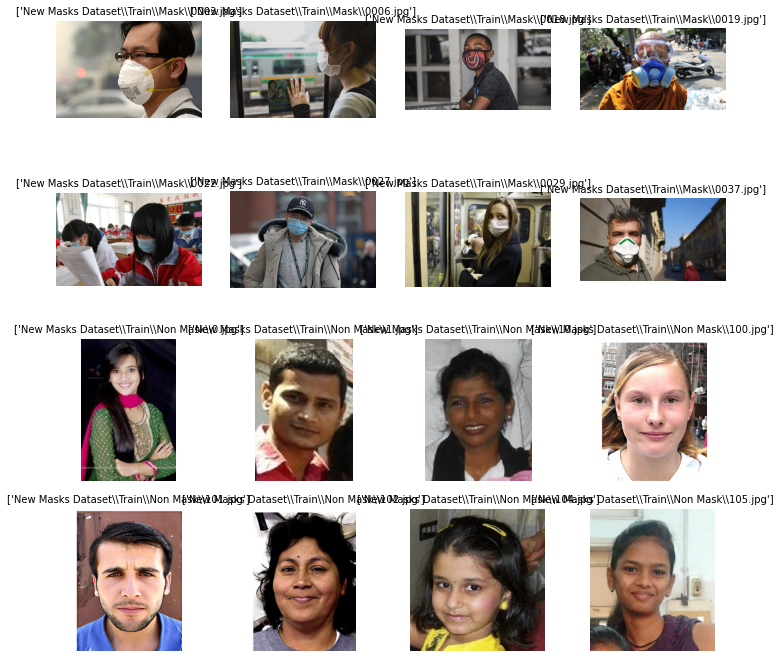

In [40]:
import matplotlib.image as mpimg
nrows = 4
ncols = 4
plt.figure(figsize=(12,12))

mask_pic = []
for i in train_mask_names[0:8]:
  mask_pic.append(os.path.join(train_mask_dir,i))

nomask_pic = []
for i in train_nomask_names[0:8]:
  nomask_pic.append(os.path.join(train_nomask_dir,i))

print(mask_pic)
print(nomask_pic)

merged_pics = mask_pic+nomask_pic

for i in range(0,len(merged_pics)):
  data = merged_pics[i].split('/',4)
  sp = plt.subplot(4,4,i+1)
  sp.axis('Off')
  image = mpimg.imread(merged_pics[i])
  sp.set_title(data,fontsize=10)
  plt.imshow(image,cmap='gray')

plt.show()
  


In [41]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   zoom_range = 0.2,
                                   rotation_range = 40,
                                   horizontal_flip = True
                                   )
test_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150,150),
                                                    batch_size = 32,
                                                    class_mode = 'binary'
                                                    )
test_generator = test_datagen.flow_from_directory(test_dir,
                                                    target_size=(150,150),
                                                    batch_size = 32,
                                                    class_mode = 'binary'
                                                    )
valid_generator = validation_datagen.flow_from_directory(valid_dir,
                                                    target_size=(150,150),
                                                    batch_size = 32,
                                                    class_mode = 'binary'
                                                    )

Found 600 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
Found 306 images belonging to 2 classes.


In [42]:
train_generator.class_indices

{'Mask': 0, 'Non Mask': 1}

In [43]:
train_generator.image_shape

(150, 150, 3)

In [44]:
model = Sequential()
model.add(Conv2D(32,(3,3),padding='SAME',activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(64,(3,3),padding='SAME',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 37, 37, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 87616)            

In [45]:
model.compile(Adam(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [46]:
history = model.fit(train_generator,
                    epochs = 30,
                    validation_data = valid_generator)

Epoch 1/30
19/19 [==============================] - 23s 1s/step - loss: 3.7005 - accuracy: 0.5300 - val_loss: 0.6930 - val_accuracy: 0.5000
Epoch 2/30
19/19 [==============================] - 14s 739ms/step - loss: 0.6866 - accuracy: 0.5267 - val_loss: 0.6925 - val_accuracy: 0.5000
Epoch 3/30
19/19 [==============================] - 15s 811ms/step - loss: 0.6148 - accuracy: 0.6850 - val_loss: 0.6103 - val_accuracy: 0.7418
Epoch 4/30
19/19 [==============================] - 14s 736ms/step - loss: 0.4523 - accuracy: 0.8050 - val_loss: 0.5389 - val_accuracy: 0.7974
Epoch 5/30
19/19 [==============================] - 14s 733ms/step - loss: 0.3904 - accuracy: 0.8500 - val_loss: 0.4599 - val_accuracy: 0.8105
Epoch 6/30
19/19 [==============================] - 14s 749ms/step - loss: 0.3338 - accuracy: 0.8817 - val_loss: 0.4084 - val_accuracy: 0.8366
Epoch 7/30
19/19 [==============================] - 14s 762ms/step - loss: 0.3364 - accuracy: 0.8950 - val_loss: 0.3988 - val_accuracy: 0.8464
Ep

In [47]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 0, 'epoch')

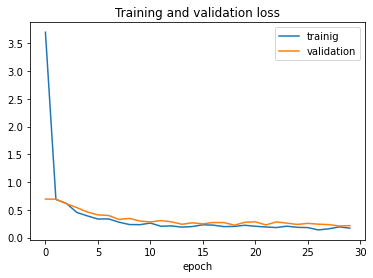

In [48]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['trainig','validation'])
plt.title('Training and validation loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

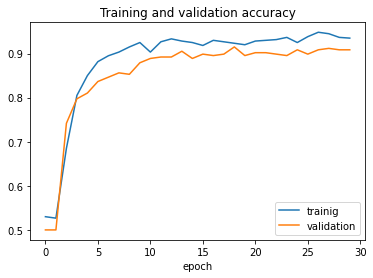

In [49]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['trainig','validation'])
plt.title('Training and validation accuracy')
plt.xlabel('epoch')

In [50]:
test_loss , test_acc = model.evaluate(test_generator)
print('test acc :{} test loss:{}'.format(test_acc,test_loss))

4/4 [==============================] - 1s 367ms/step - loss: 0.1581 - accuracy: 0.9300
test acc :0.9300000071525574 test loss:0.15805809199810028


In [53]:
import numpy as np
from keras.preprocessing import image

img_path='A2.jpg'
img = image.load_img(img_path , target_size=(150,150))
images = image.img_to_array(img)
images=np.expand_dims(images,axis=0)
prediction = model.predict(images)
if prediction==0:
    print('mask')
else:
    print('nomask')

mask
